In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datapath = "../data/raw/"
df = pd.read_csv(f'{datapath}train.csv')
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


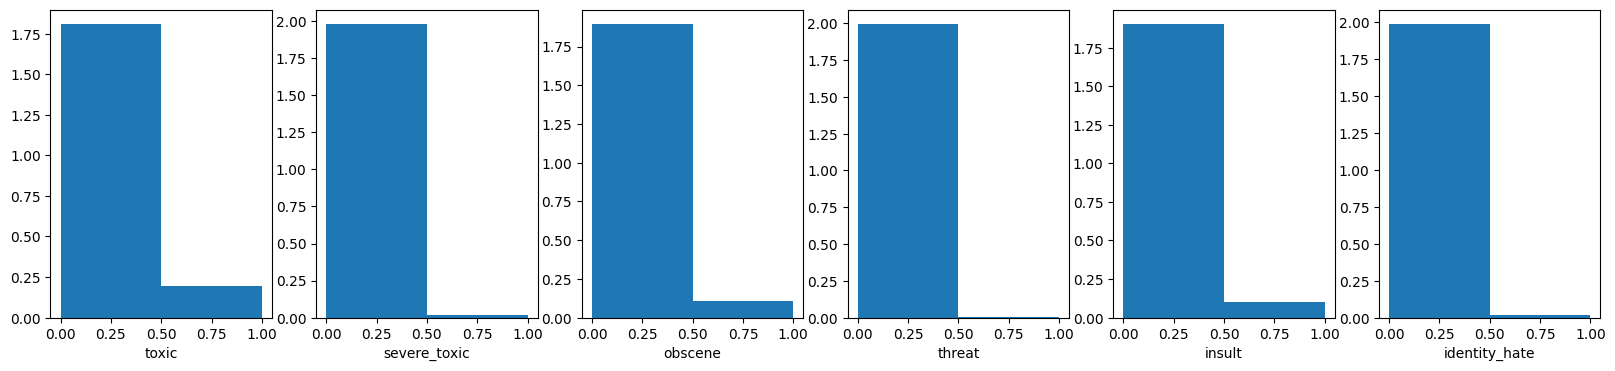

In [5]:
cats = df.columns[2:]

fig, axs = plt.subplots(1,len(cats), figsize=[20,4])
for i,col in enumerate(cats):
    axs[i].hist(df[col], bins=2, density=True)
    axs[i].set_xlabel(col)

10.17% toxic comments of any type in data


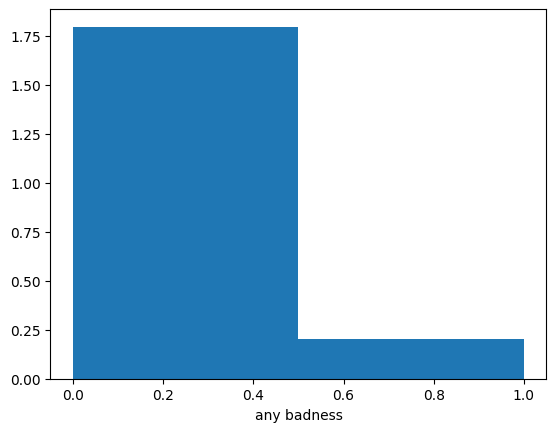

In [6]:
anytox = (df[cats].sum(axis=1)>0)*1
print(f"{100*anytox.mean():.4}% toxic comments of any type in data")
plt.hist( anytox, density=True, bins=2 )
plt.xlabel('any badness');

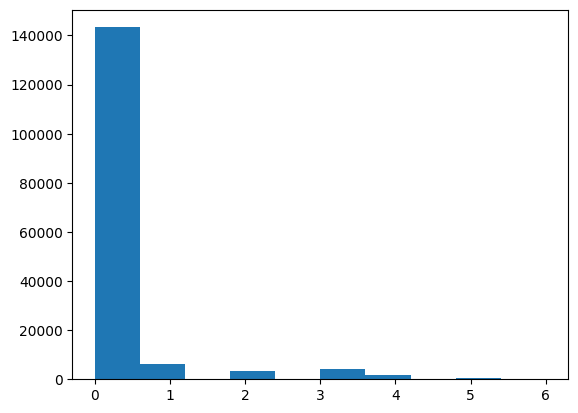

In [7]:
sumcol = df[cats].sum(axis=1)
plt.hist(sumcol);

### Tokenization

In [8]:
from transformers import AutoTokenizer

In [9]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [10]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [11]:
nized = tokenizer(df['comment_text'][0], return_tensors='pt')
nized

{'input_ids': tensor([[  101,  7526,  2339,  1996, 10086,  2015,  2081,  2104,  2026,  5310,
         18442, 13076, 12392,  2050,  5470,  2020, 16407,  1029,  2027,  4694,
          1005,  1056,  3158,  9305, 22556,  1010,  2074,  8503,  2006,  2070,
          3806,  2044,  1045,  5444,  2012,  2047,  2259, 14421,  6904,  2278,
          1012,  1998,  3531,  2123,  1005,  1056,  6366,  1996, 23561,  2013,
          1996,  2831,  3931,  2144,  1045,  1005,  1049,  3394,  2085,  1012,
          6486,  1012, 16327,  1012,  4229,  1012,  2676,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 

In [134]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      #problem_type="multi_label_classification",
                                                      num_labels=6)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [14]:
import torch
inputs = nized['input_ids'].view(1,-1)
mask = nized['attention_mask']
output = model(input_ids=inputs, attention_mask=mask)

In [18]:
output.logits

tensor([[ 0.0055,  0.3391,  0.1669,  0.2375, -0.1405, -0.9238]],
       grad_fn=<AddmmBackward0>)

In [120]:
%%time
ntrain = 1000
ntest = 500
tokens = tokenizer(list(df['comment_text'][0:ntrain+ntest]), truncation=True, max_length=32, padding="max_length", return_tensors="pt")

CPU times: user 443 ms, sys: 43.4 ms, total: 487 ms
Wall time: 91.9 ms


In [121]:
tokens['input_ids'].shape

torch.Size([1500, 32])

In [122]:
tokens['attention_mask']

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])

In [123]:
model(tokens['input_ids'][0:3],tokens['attention_mask'][0:3])

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0497,  0.3504,  0.0508,  0.2502, -0.0682, -0.9759],
        [-0.0296,  0.4392,  0.1011,  0.2072, -0.1990, -0.9391],
        [-0.1344,  0.3408, -0.0733,  0.2274, -0.1279, -0.9360]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [124]:
model(tokens['input_ids'][0:3])

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0497,  0.3504,  0.0508,  0.2502, -0.0682, -0.9759],
        [-0.0296,  0.4392,  0.1011,  0.2072, -0.1990, -0.9391],
        [-0.1344,  0.3408, -0.0733,  0.2274, -0.1279, -0.9360]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

#### Save some preliminary training and test data

In [125]:
torch.save(tokens['input_ids'][0:ntrain],f'../data/processed/input_train_n{ntrain}_l32.pt')
torch.save(tokens['input_ids'][ntrain:ntrain+ntest],f'../data/processed/input_test_n{ntest}_l32.pt')

In [127]:
labels = torch.tensor( df[cats][0:ntrain].values ).float()

In [128]:
torch.save(labels, f'../data/processed/labels_train_n{ntrain}.pt')
torch.save(labels, f'../data/processed/labels_train_n{ntest}.pt')

In [136]:
model.config.problem_type#="multi_label_classification"

In [137]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [112]:
labels[0:3].long()

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])

In [113]:
model(tokens['input_ids'][0:3], labels=labels[0:3])

SequenceClassifierOutput(loss=tensor(0.6726, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[-0.0497,  0.3504,  0.0508,  0.2502, -0.0682, -0.9759],
        [-0.0296,  0.4392,  0.1011,  0.2072, -0.1990, -0.9391],
        [-0.1344,  0.3408, -0.0733,  0.2274, -0.1279, -0.9360]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

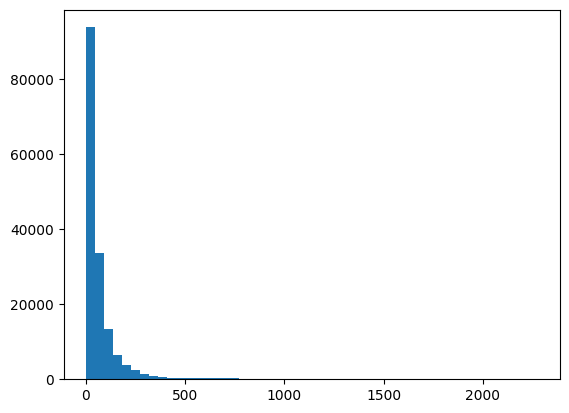

In [114]:
plt.hist(df['comment_text'].str.split(' ').map(len), bins=50);

In [ ]:
model